<a href="https://colab.research.google.com/github/dartyourt/finalprosic24/blob/main/scalp_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARATION

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_dir = '/content/drive/MyDrive/Dataset-Image'
img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # Memisahkan 20% data untuk validasi
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 409 images belonging to 8 classes.
Found 100 images belonging to 8 classes.


In [6]:
import os
import pandas as pd
categories = os.listdir(data_dir)
data = {'Category': [], 'Number of Images': []}

for category in categories:
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        num_images = len(os.listdir(category_dir))
        data['Category'].append(category)
        data['Number of Images'].append(num_images)

df = pd.DataFrame(data)
print(df)

                    Category  Number of Images
0        tinea-capitis-atlas                60
1                     normal               200
2            alopecia-areata                61
3            scalp-psoriasis                31
4     seborrhoeic-dermatitis                40
5      alopecia-areata-atlas                72
6  scalp-psoriasis-dermaamin                31
7              tinea-capitis                14


# CREATE MODEL

In [9]:
# Create CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # 8 kategori
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

di bawah ini training...

In [12]:
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/20
12/12 [==============================] - 190s 16s/step - loss: 2.0534 - accuracy: 0.3369 - val_loss: 1.6544 - val_accuracy: 0.3854
Epoch 2/20
12/12 [==============================] - 21s 2s/step - loss: 1.5013 - accuracy: 0.4483 - val_loss: 1.5789 - val_accuracy: 0.4583
Epoch 3/20
12/12 [==============================] - 22s 2s/step - loss: 1.3074 - accuracy: 0.5199 - val_loss: 1.5022 - val_accuracy: 0.4167
Epoch 4/20
12/12 [==============================] - 21s 2s/step - loss: 1.2459 - accuracy: 0.5225 - val_loss: 1.4755 - val_accuracy: 0.4688
Epoch 5/20
12/12 [==============================] - 25s 2s/step - loss: 1.0804 - accuracy: 0.6154 - val_loss: 1.3797 - val_accuracy: 0.5104
Epoch 6/20
12/12 [==============================] - 22s 2s/step - loss: 1.0414 - accuracy: 0.6127 - val_loss: 1.4318 - val_accuracy: 0.4896
Epoch 7/20
12/12 [==============================] - 21s 2s/step - loss: 0.8816 - accuracy: 0.7003 - val_loss: 1.5135 - val_accuracy: 0.5208
Epoch 8/20
12/12 [

evaluasi model

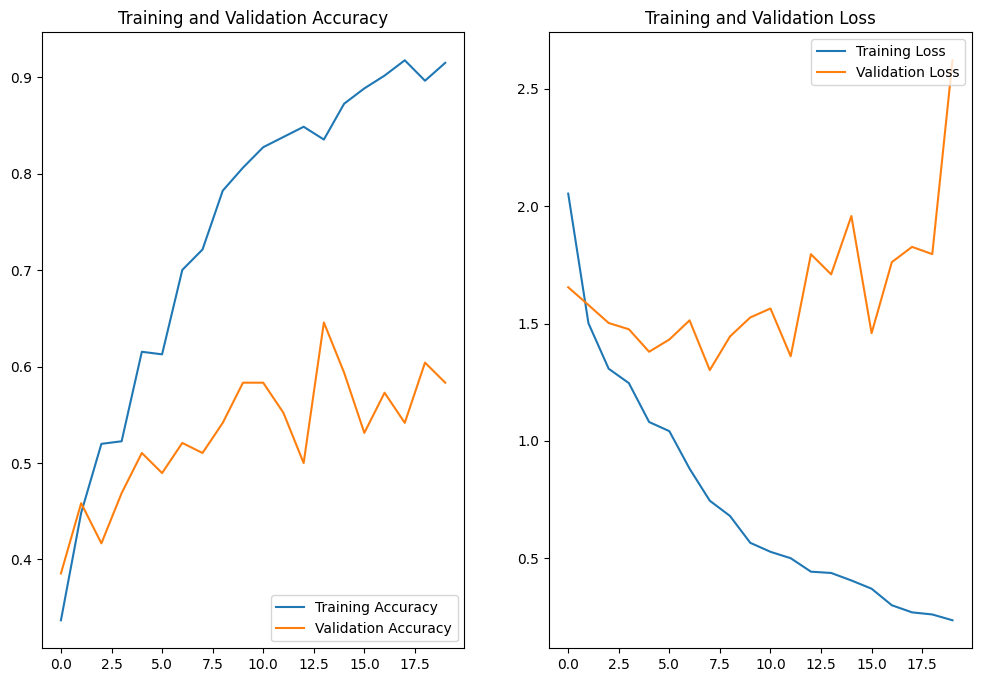

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [14]:
# save the Model that had created
model.save('scalp_condition_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# MODEL PREDICT

In [15]:
model = tf.keras.models.load_model('scalp_condition_classifier_model.h5')

In [30]:
datatrain_dir = '/content/drive/MyDrive/datatrain'  # Gantilah dengan path direktori datatrain Anda
img_height, img_width = 150, 150
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0/255)

datatrain_generator = datagen.flow_from_directory(
    datatrain_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode= 'caterogical',  # Karena kita hanya ingin prediksi
    shuffle=False  # Untuk menjaga urutan file
)


ValueError: Invalid class_mode: caterogical; expected one of: {'binary', 'sparse', 'input', 'categorical', None}

In [29]:
  predictions = model.predict(datatrain_generator, steps=len(datatrain_generator), verbose=1)
  predicted_classes = np.argmax(predictions, axis=1)

ValueError: Unexpected value for `steps_per_epoch`. Received value is 0. Please check the docstring for `model.fit()` for supported values.